In [122]:
import pandas as pd
import numpy as np
from physics_computer.ski_alpine import SkiAlpine
from pathlib import Path

from matplotlib import pyplot as plt


5,3 
7,3
9,3 filter fenster

längen von beschleunigung, x, geschwindigkeit

In [123]:
skicross_files = Path("/home/schafhdaniel@edu.local/cds_im_spitzensport/data_gps/").glob("SX*.csv")
skicross_files = list(skicross_files)
skicross_files

[PosixPath('/home/schafhdaniel@edu.local/cds_im_spitzensport/data_gps/SX_M_1.csv'),
 PosixPath('/home/schafhdaniel@edu.local/cds_im_spitzensport/data_gps/SX_W_1.csv'),
 PosixPath('/home/schafhdaniel@edu.local/cds_im_spitzensport/data_gps/SX_W_2.csv'),
 PosixPath('/home/schafhdaniel@edu.local/cds_im_spitzensport/data_gps/SX_M_2.csv')]

In [124]:
df_modified.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'speedD', 'speedE', 'speedN',
       'run', 'tf_id', 'discipline_from_name', 'timestamp', 'time', 'date',
       'dt', 'x', 'y', 'z', 'x_sp', 'y_sp', 'z_sp', 'x_v_sp', 'y_v_sp',
       'z_v_sp', 'x_a_sp', 'y_a_sp', 'z_a_sp', 'v_sp', 'a_sp', 'x_T_sp',
       'y_T_sp', 'z_T_sp', 'x_N_sp', 'y_N_sp', 'z_N_sp', 'k', 'k_xy_sp',
       's_sp', 'aBahn_sp', 'aHang_sp', 'x_aHang_sp', 'y_aHang_sp',
       'z_aHang_sp', 'x_aZent_sp', 'y_aZent_sp', 'z_aZent_sp', 'aZent_sp',
       'x_aBoden_sp', 'y_aBoden_sp', 'z_aBoden_sp', 'aBoden_sp', 'aReibung_sp',
       'ifly'],
      dtype='object')

In [125]:
file = skicross_files[1]
file = '/home/schafhdaniel@edu.local/cds_im_spitzensport/data_gps/SX_M_2.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,elevation,latitude,longitude,speedD,speedE,speedN,run,tf_id,discipline_from_name,timestamp
0,599,2741.093,46.505103,9.801563,1.785,5.582,-2.358,2,110588,-,20250319T115504900000
1,600,2740.868,46.505101,9.801570,1.851,5.653,-2.737,2,110588,-,20250319T115505000000
2,601,2740.717,46.505098,9.801578,1.820,5.845,-2.885,2,110588,-,20250319T115505100000
3,602,2740.661,46.505095,9.801586,1.682,5.787,-3.245,2,110588,-,20250319T115505200000
4,603,2740.667,46.505092,9.801594,1.489,5.841,-3.611,2,110588,-,20250319T115505300000


In [126]:
config = {"savitzky_golay": {"window_size": 35,"order": 5}}

alpine = SkiAlpine(df, config=config)
df_modified = alpine.compute()

2025-10-02 12:32:58.576 | INFO     | physics_computer.base:_modify_config:57 - running _modify_config ...
2025-10-02 12:32:58.578 | INFO     | physics_computer.base:_convert_timestamp:148 - running _convert_timestamp ...
2025-10-02 12:32:58.591 | INFO     | physics_computer.base:_convert_coordinates:100 - running _convert_coordinates ...
2025-10-02 12:32:58.635 | INFO     | physics_computer.base:_compute_absolute_value:210 - running _compute_absolute_value ...
2025-10-02 12:32:58.717 | INFO     | physics_computer.base:_compute_tangential_vector:235 - running _compute_tangential_vector ...
2025-10-02 12:32:59.186 | INFO     | physics_computer.base:_compute_k:253 - running _compute_k ...
2025-10-02 12:32:59.259 | INFO     | physics_computer.base:_compute_k_xy:274 - running _compute_k_xy ...
2025-10-02 12:32:59.306 | INFO     | physics_computer.base:_compute_slope:293 - running _compute_slope ...
2025-10-02 12:32:59.352 | INFO     | physics_computer.base:_compute_accelerations:336 - runni

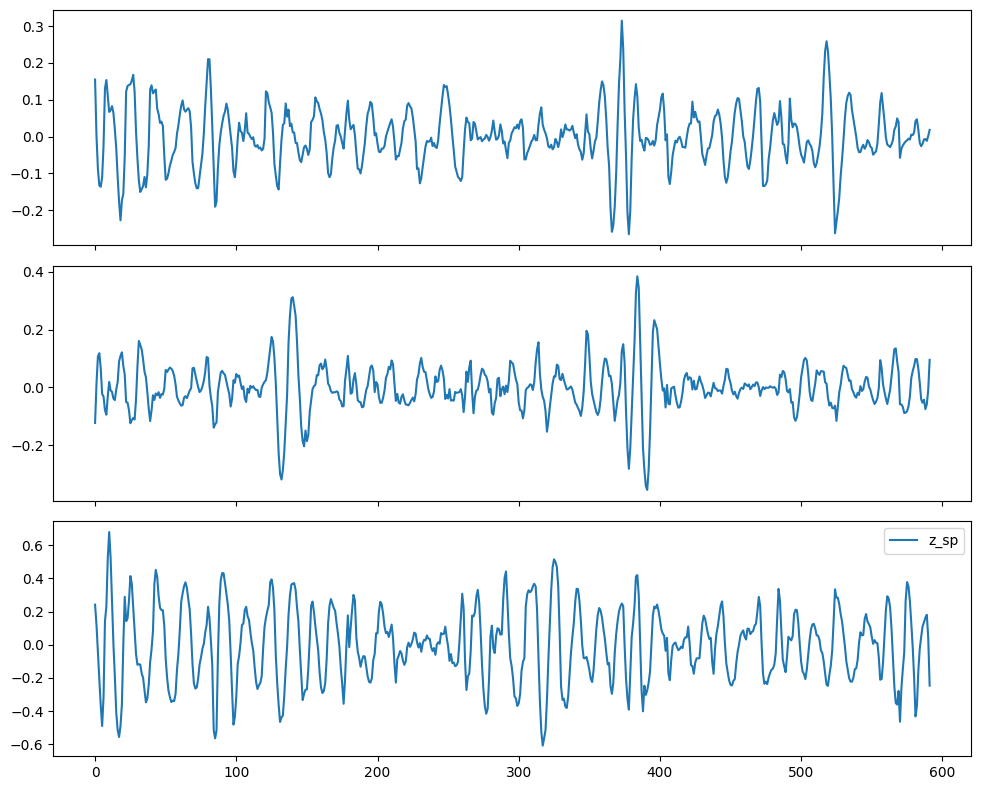

In [127]:


fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
axs[0].plot(df_modified["x"] - df_modified["x_sp"], label="x - x_sp")
axs[1].plot(df_modified["y"] - df_modified["y_sp"], label="y - y_sp")
axs[2].plot(df_modified["z"]-df_modified["z_sp"], label="z_sp")

plt.tight_layout()
plt.legend()


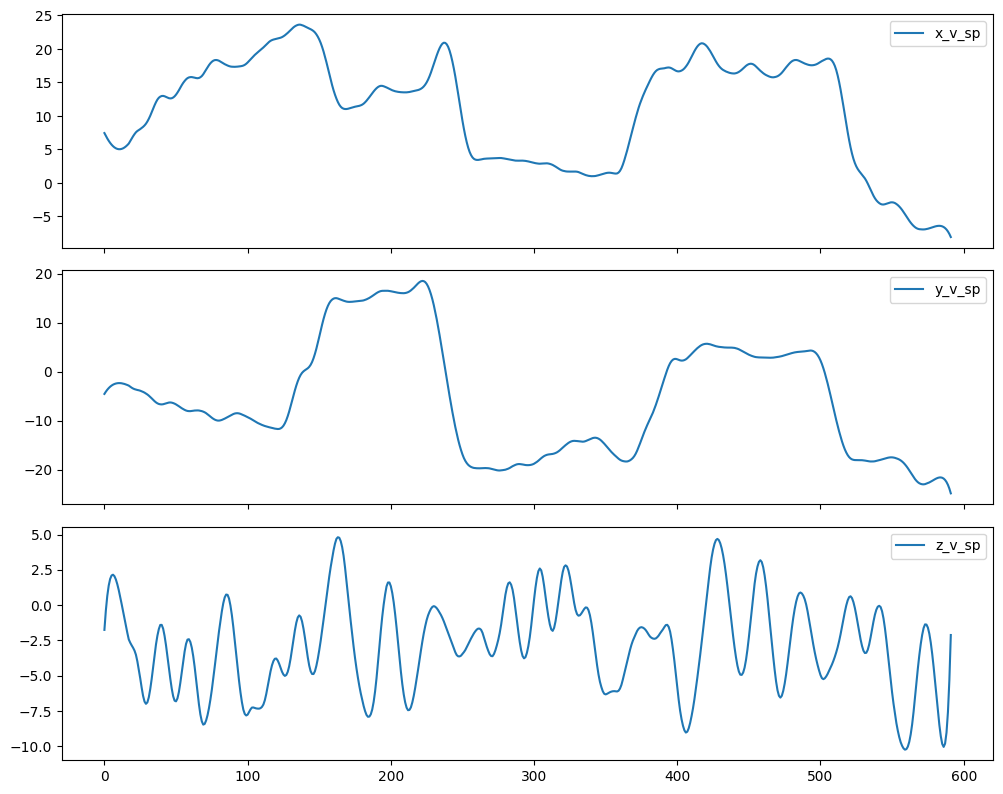

In [128]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
for i, colname in enumerate(["x_v_sp", "y_v_sp", "z_v_sp"]):
    axs[i].plot(df_modified[colname], label=colname)
    axs[i].legend()
plt.tight_layout()
plt.legend()

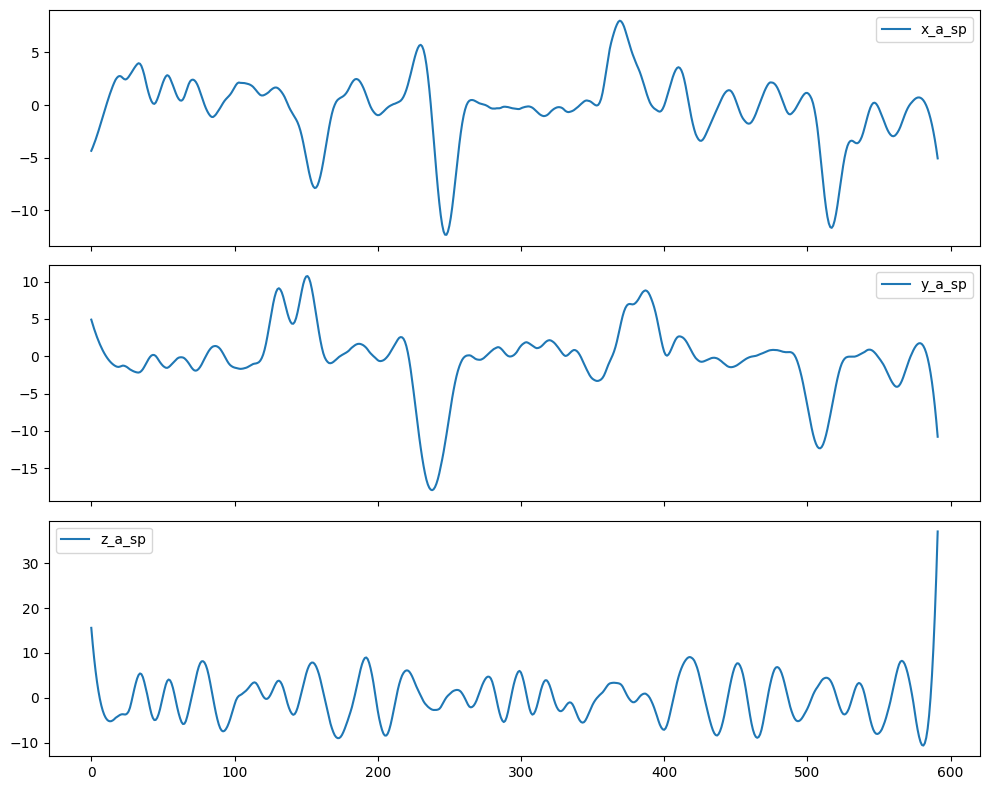

In [129]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
for i, colname in enumerate(["x_a_sp", "y_a_sp", "z_a_sp"]):
    axs[i].plot(df_modified[colname], label=colname)
    axs[i].legend()
plt.tight_layout()
plt.legend()

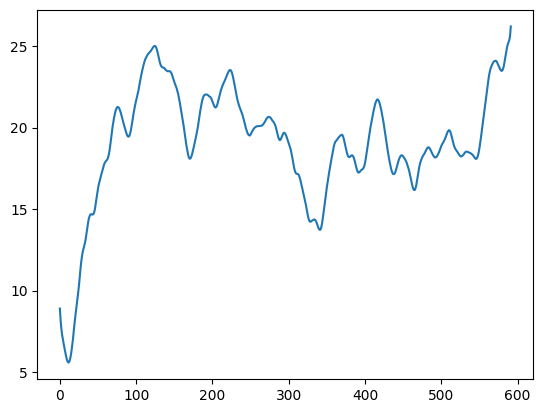

In [130]:
plt.plot(df_modified["v_sp"], label="v_sp")

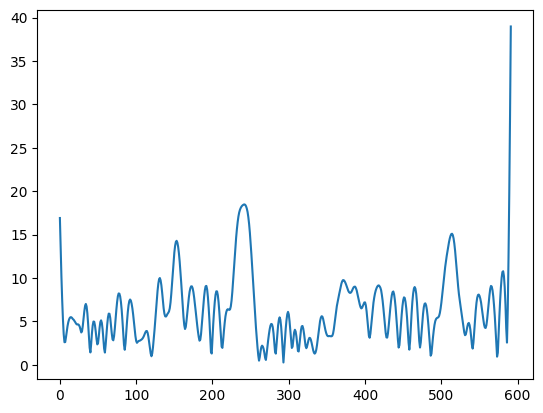

In [131]:
plt.plot(df_modified["a_sp"], label="a_sp")


In [132]:
len(df_modified)

592